# Esophageal Cancer

To solve the question: "What's the relationship between the TP53 gene andEsophageal Cancer when considering the influence of age?" 

# 1.Data Processing

In [3]:
import pandas as pd
import numpy as np

# Corrected file paths
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.ESCA.sampleMap_ESCA_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)


In [4]:
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,...,_GENOMIC_ID_TCGA_ESCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_ESCA_exp_HiSeq,_GENOMIC_ID_TCGA_ESCA_miRNA_HiSeq,_GENOMIC_ID_TCGA_ESCA_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_ESCA_gistic2,_GENOMIC_ID_TCGA_ESCA_gistic2thd,_GENOMIC_ID_TCGA_ESCA_mutation_broad_gene,_GENOMIC_ID_TCGA_ESCA_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_ESCA_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_ESCA_PDMRNAseqCNV
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,MSI-L,TCGA-2H-A9GF-01,TCGA-2H-A9GF,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,67,...,2666431c-515b-4088-a448-baf7c52106d8,TCGA-2H-A9GF-01A-11R-A37I-31,TCGA-2H-A9GF-01,TCGA-2H-A9GF-01A-11D-A37C-09,TCGA-2H-A9GF-01A-11D-A37B-01,TCGA-2H-A9GF-01A-11D-A37B-01,TCGA-2H-A9GF-01A-11D-A37C-09,2666431c-515b-4088-a448-baf7c52106d8,TCGA-2H-A9GF-01A-11D-A37C-09,TCGA-2H-A9GF-01
TCGA-2H-A9GG-01,MSI-L,TCGA-2H-A9GG-01,TCGA-2H-A9GG,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,66,...,9fcd3933-2651-4c64-8c77-3dac4d8ea595,TCGA-2H-A9GG-01A-11R-A37I-31,TCGA-2H-A9GG-01,NaN,NaN,NaN,NaN,9fcd3933-2651-4c64-8c77-3dac4d8ea595,NaN,NaN
TCGA-2H-A9GH-01,MSS,TCGA-2H-A9GH-01,TCGA-2H-A9GH,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,44,...,775bb1a6-0463-4e78-bc3f-596e3a5eb38f,TCGA-2H-A9GH-01A-11R-A37I-31,TCGA-2H-A9GH-01,TCGA-2H-A9GH-01A-11D-A37C-09,TCGA-2H-A9GH-01A-11D-A37B-01,TCGA-2H-A9GH-01A-11D-A37B-01,TCGA-2H-A9GH-01A-11D-A37C-09,775bb1a6-0463-4e78-bc3f-596e3a5eb38f,TCGA-2H-A9GH-01A-11D-A37C-09,TCGA-2H-A9GH-01
TCGA-2H-A9GI-01,MSS,TCGA-2H-A9GI-01,TCGA-2H-A9GI,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,68,...,3e9a405f-cb27-4773-b501-57a2eaf833d4,TCGA-2H-A9GI-01A-11R-A37I-31,TCGA-2H-A9GI-01,TCGA-2H-A9GI-01A-11D-A37C-09,TCGA-2H-A9GI-01A-11D-A37B-01,TCGA-2H-A9GI-01A-11D-A37B-01,TCGA-2H-A9GI-01A-11D-A37C-09,3e9a405f-cb27-4773-b501-57a2eaf833d4,TCGA-2H-A9GI-01A-11D-A37C-09,TCGA-2H-A9GI-01
TCGA-2H-A9GJ-01,MSS,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,57,...,67bda296-5e65-45a9-962e-a99f51a12e14,TCGA-2H-A9GJ-01A-11R-A37I-31,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ-01A-11D-A37C-09,TCGA-2H-A9GJ-01A-11D-A37B-01,TCGA-2H-A9GJ-01A-11D-A37B-01,TCGA-2H-A9GJ-01A-11D-A37C-09,67bda296-5e65-45a9-962e-a99f51a12e14,TCGA-2H-A9GJ-01A-11D-A37C-09,TCGA-2H-A9GJ-01


In [5]:
gene_data.head()

,TCGA-L5-A4OF-01,TCGA-LN-A49R-01,TCGA-Z6-A9VB-01,TCGA-L5-A8NF-01,TCGA-2H-A9GG-01,TCGA-IG-A3QL-01,TCGA-VR-AA7B-01,TCGA-2H-A9GN-01,TCGA-L7-A6VZ-01,TCGA-L5-A4OF-11,...,TCGA-L5-A4ON-01,TCGA-LN-A4A1-01,TCGA-R6-A8WC-01,TCGA-L5-A4OR-11,TCGA-L5-A88Z-01,TCGA-JY-A6FG-01,TCGA-L5-A4OM-01,TCGA-Z6-A8JE-01,TCGA-L5-A4OQ-01,TCGA-M9-A5M8-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.346108,-0.900892,-0.284892,0.743108,2.075308,-2.573692,0.204308,2.126808,-0.005492,0.108108,...,0.474308,0.026308,1.397708,0.204708,-1.251092,0.742408,-0.346092,-0.051892,1.588408,1.040308
HIF3A,6.799274,-1.649026,-2.676126,1.323974,1.644074,4.542674,1.987874,-0.526626,0.983874,3.616474,...,0.793874,-2.759026,1.469874,4.360974,-2.890026,-3.941826,1.259274,5.328074,4.529274,-2.615326
RNF17,8.020965,0.335165,0.207865,-0.531035,-0.531035,0.316065,-0.197535,-0.531035,-0.200335,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.136835,-0.531035,-0.149235,0.277265,-0.531035,-0.531035
RNF10,-0.052472,-0.162772,-0.103472,0.199728,-0.143172,-0.542672,-0.081372,0.002928,0.715428,0.504128,...,0.193828,-0.111372,0.298328,0.914828,0.218628,0.984628,0.005928,-0.025472,-0.032372,0.095328
RNF11,-0.727578,0.226422,0.045122,0.040222,-0.389978,-0.189378,0.569622,0.145622,-0.591578,0.056922,...,0.014822,0.940222,-1.251278,0.592822,-0.431478,0.851022,0.293222,0.706922,-0.397778,0.120722


In [6]:
gene_fullname = 'KRAS gene'
gene = 'kras'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Bladder Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 120 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-L5-A4OF-01,1.346108,6.799274,8.020965,-0.052472,-0.727578,-0.76851,-0.164194,0.210754,1.567201,1.358328,...,5.183622,-0.593417,-0.925433,2.05781,-0.285677,-0.691486,0.341773,-1.122795,2.804467,-0.491612
TCGA-LN-A49R-01,-0.900892,-1.649026,0.335165,-0.162772,0.226422,0.17829,0.496706,0.222354,0.980201,0.042128,...,1.441922,-0.720917,0.666267,3.43191,0.159323,0.579314,-0.537627,-1.109095,-0.418633,0.199588
TCGA-Z6-A9VB-01,-0.284892,-2.676126,0.207865,-0.103472,0.045122,0.87149,0.410706,-1.521546,1.454601,0.538728,...,-0.009978,-1.587117,-0.845733,2.75291,0.805823,0.008214,-1.925927,-1.690995,-0.447633,-1.563612
TCGA-L5-A8NF-01,0.743108,1.323974,-0.531035,0.199728,0.040222,0.39999,0.574006,0.074254,2.597101,-0.554172,...,-0.309878,-0.811917,-1.518833,5.22631,0.367423,-1.637286,-0.671327,-1.142795,1.730767,-0.355512
TCGA-2H-A9GG-01,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,1.625528,...,-0.748878,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-JY-A6FG-01,0.742408,-3.941826,-0.531035,0.984628,0.851022,-0.65321,-0.020094,-0.355846,-0.423399,0.288128,...,-0.748878,-1.587117,-2.372333,2.87901,-0.594077,0.392514,-2.470027,0.490305,-4.658833,-0.804012
TCGA-L5-A4OM-01,-0.346092,1.259274,-0.149235,0.005928,0.293222,0.27769,0.371406,-1.214246,1.071401,1.238428,...,-0.748878,0.423783,-2.463733,4.01071,0.335723,0.236614,-1.302627,-2.441395,0.094567,-1.633012
TCGA-Z6-A8JE-01,-0.051892,5.328074,0.277265,-0.025472,0.706922,-0.24201,0.281006,1.500954,1.707501,0.241728,...,0.776122,-0.062117,-1.263333,3.94471,-0.152777,0.465414,0.643373,-0.700895,-4.717233,-0.877212
TCGA-L5-A4OQ-01,1.588408,4.529274,-0.531035,-0.032372,-0.397778,-0.74421,0.630706,-0.442446,2.409501,-0.237072,...,3.390722,0.510883,-0.746633,3.31481,-0.908677,-0.687986,1.055773,0.231705,0.747767,0.152988


In [7]:
merged_data = clinical_data.join(gene_data.T, rsuffix='_gd')

merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,MSI-L,TCGA-2H-A9GF-01,TCGA-2H-A9GF,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,67,...,0.646322,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812
TCGA-2H-A9GG-01,MSI-L,TCGA-2H-A9GG-01,TCGA-2H-A9GG,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,66,...,-0.748878,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812
TCGA-2H-A9GH-01,MSS,TCGA-2H-A9GH-01,TCGA-2H-A9GH,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,44,...,-0.301178,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788
TCGA-2H-A9GI-01,MSS,TCGA-2H-A9GI-01,TCGA-2H-A9GI,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,68,...,-0.748878,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788
TCGA-2H-A9GJ-01,MSS,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,57,...,1.729622,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188


In [8]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,-24487,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,0.646322,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812
TCGA-2H-A9GG-01,-24328,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-0.748878,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812
TCGA-2H-A9GH-01,-16197,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-0.301178,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788
TCGA-2H-A9GI-01,-25097,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-0.748878,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788
TCGA-2H-A9GJ-01,-21180,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,1.729622,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188


In [9]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bladder Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,-24487,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812,1
TCGA-2H-A9GG-01,-24328,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812,1
TCGA-2H-A9GH-01,-16197,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788,1
TCGA-2H-A9GI-01,-25097,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788,1
TCGA-2H-A9GJ-01,-21180,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188,1


In [10]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

In [11]:
print(list(merged_data.columns))
print(len(merged_data.columns))

['days_to_birth', 'ARHGEF10L', 'HIF3A', 'RNF17', 'RNF10', 'RNF11', 'RNF13', 'GTF2IP1', 'REM1', 'MTVR2', 'RTN4RL2', 'C16orf13', 'C16orf11', 'FGFR1OP2', 'TSKS', 'ATRX', 'PMM2', 'LOC100272146', 'ASS1', 'NCBP1', 'ZNF709', 'ZNF708', 'RBM14', 'NCBP2', 'DISC1', 'CAMK1', 'RPL37', 'SPR', 'ZNF700', 'ZNF707', 'CAMK4', 'ZNF704', 'LOC339240', 'GOLGA6B', 'RNF115', 'RNF112', 'ZC3H14', 'SPN', 'HMGCLL1', 'NACAP1', 'LRRTM1', 'GRIN1', 'RBMY1A3P', 'DHX8', 'DHX9', 'LOC441204', 'TCOF1', 'LRRTM3', 'NUP98', 'XPC', 'SLC12A2', 'GRINA', 'LRRTM2', 'NUP93', 'HAP1', 'KLRA1', 'CAMKV', 'SPPL3', 'GOLIM4', 'ZNF646', 'OPA3', 'OPA1', 'RHEB', 'RAB40C', 'RAB40B', 'RAB40A', 'COL7A1', 'MDP1', 'GTSE1', 'FAM183A', 'ARFRP1', 'OVCH1', 'FAM183B', 'PSAP', 'KIAA0831', 'SPPL2A', 'SLC46A1', 'TGFBR2', 'ITGA8', 'ITGA9', 'STK40', 'MYO3B', 'ATP2A1', 'ATP2A2', 'ATP2A3', 'ITGA1', 'ITGA2', 'ITGA3', 'ITGA4', 'ITGA5', 'ITGA6', 'ITGA7', 'TRHR', 'LOC100132288', 'DENND4A', 'DENND4B', 'DENND4C', 'SWAP70', 'RARRES1', 'LOC100132287', 'PHLDA3', 'PHL

# 2. Preliminary analysis

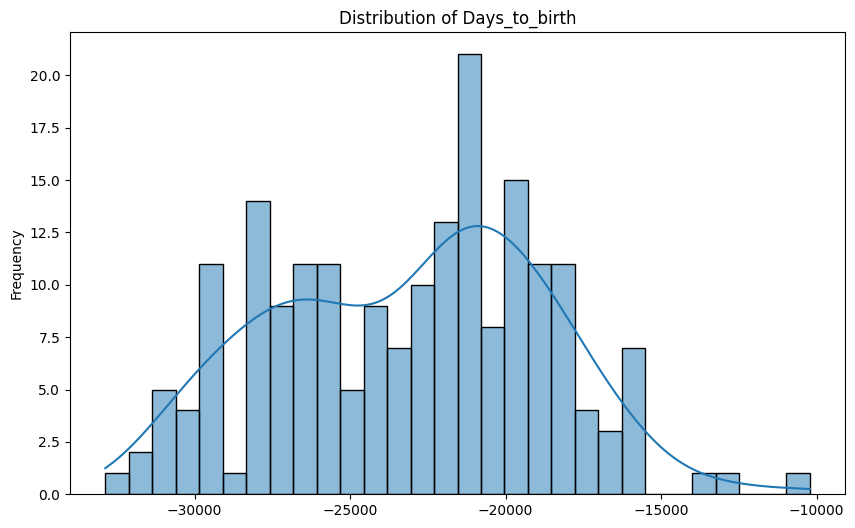

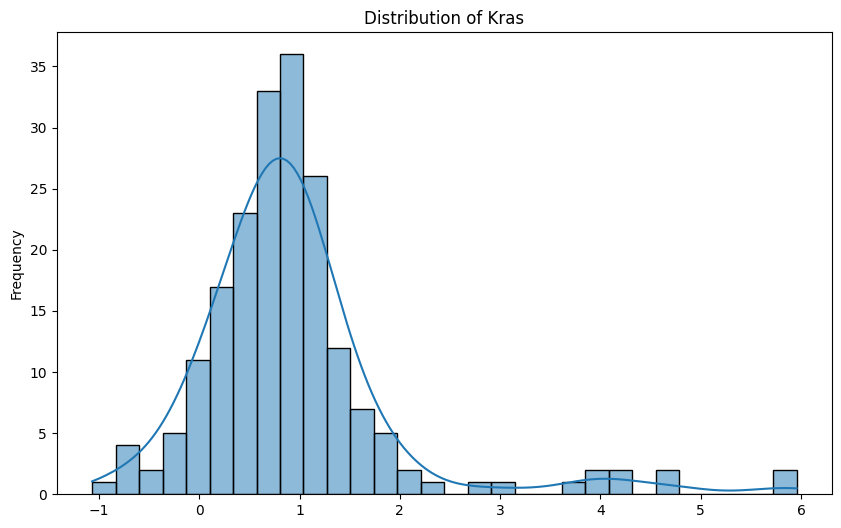

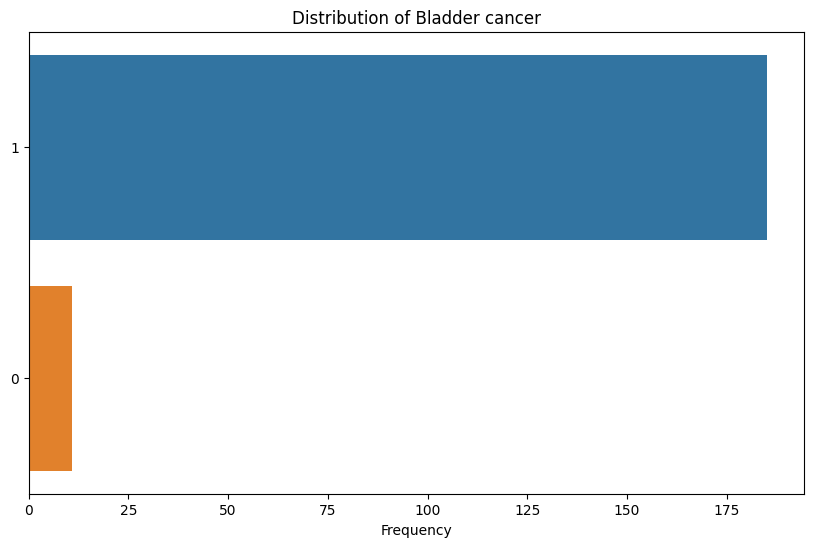

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

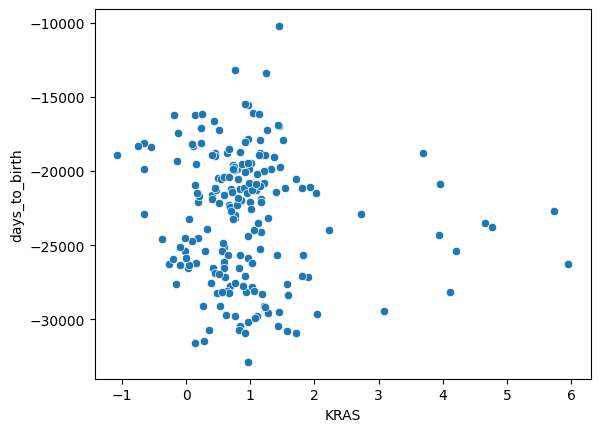

In [14]:
sns.scatterplot(data=merged_data, x='KRAS', y=condition_col)
plt.show()

In [15]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bladder Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,67,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812,1
TCGA-2H-A9GG-01,66,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812,1
TCGA-2H-A9GH-01,44,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788,1
TCGA-2H-A9GI-01,68,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788,1
TCGA-2H-A9GJ-01,57,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188,1


# 3. Do regression & Cross Validation

In [16]:
merged_data.values

array([[67.        ,  0.90560753,  2.58677366, ...,  0.25906672,
        -1.4288124 ,  1.        ],
       [66.        ,  2.07530753,  1.64407366, ...,  2.34046672,
        -1.0498124 ,  1.        ],
       [44.        ,  0.34900753,  3.22497366, ...,  0.79576672,
         0.1197876 ,  1.        ],
       ...,
       [53.        , -0.28489247, -2.67612634, ..., -0.44763328,
        -1.5636124 ,  1.        ],
       [57.        ,  0.35310753, -1.63362634, ..., -2.91833328,
        -0.7683124 ,  1.        ],
       [65.        , -0.47639247, -1.38462634, ...,  1.32136672,
         0.2732876 ,  1.        ]])

In [17]:
merged_data.dtypes

age                 int32
ARHGEF10L         float64
HIF3A             float64
RNF17             float64
RNF10             float64
                   ...   
BCL6B             float64
GSTK1             float64
SELP              float64
SELS              float64
Bladder Cancer      int64
Length: 20532, dtype: object

In [18]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

d:\temp\temp\ipykernel_16792\2284219672.py:12: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std
D:\Anaconda3\lib\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in true_divide
  ts = beta / np.sqrt(var * sigma)
D:\Anaconda3\lib\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.8639053254437871


In [19]:
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [20]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For kras:
KRAS: Coefficient = -0.004659059288751426, p-value = 0.7304482147990933

For age:
age: Coefficient = 0.0312648344583919, p-value = 0.00767434542067938



In [21]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between KRAS gene and Bladder Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the KRAS gene and Bladder Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the KRAS gene and Bladder Cancer when considering the influence of age.




In [22]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: KRAS
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is positive, and it is statistically significant (p-value < 0.05).




# 4.Discussion 

In [23]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: KRAS
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the KRAS gene and Bladder Cancer when considering the influence of age.


